In [ ]:
pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bhaveshmittal/melanoma-cancer-dataset
!unzip melanoma-cancer-dataset.zip -d melanoma_data

Streaming output truncated to the last 5000 lines.
  inflating: melanoma_data/train/Malignant/1530.jpg  
  inflating: melanoma_data/train/Malignant/1531.jpg  
  inflating: melanoma_data/train/Malignant/1532.jpg  
  inflating: melanoma_data/train/Malignant/1533.jpg  
  inflating: melanoma_data/train/Malignant/1534.jpg  
  inflating: melanoma_data/train/Malignant/1535.jpg  
  inflating: melanoma_data/train/Malignant/1536.jpg  
  inflating: melanoma_data/train/Malignant/1537.jpg  
  inflating: melanoma_data/train/Malignant/1538.jpg  
  inflating: melanoma_data/train/Malignant/1539.jpg  
  inflating: melanoma_data/train/Malignant/154.jpg  
  inflating: melanoma_data/train/Malignant/1540.jpg  
  inflating: melanoma_data/train/Malignant/1541.jpg  
  inflating: melanoma_data/train/Malignant/1542.jpg  
  inflating: melanoma_data/train/Malignant/1543.jpg  
  inflating: melanoma_data/train/Malignant/1544.jpg  
  inflating: melanoma_data/train/Malignant/1545.jpg  
  inflating: melanoma_data/train

In [ ]:
import os
print(os.listdir("melanoma_data"))

['train', 'test']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Use "train" directory for both training and validation
train_generator = train_datagen.flow_from_directory(
    "melanoma_data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"  # 80% Training
)

val_generator = val_datagen.flow_from_directory(
    "melanoma_data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"  # 20% Validation
)


Found 9504 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.


In [ ]:
!pip install datasets


In [ ]:
from datasets import load_dataset

# Load the dataset (Replace with your actual path)
dataset_path = "/content/melanoma_data"
ds = load_dataset(dataset_path)

# Check dataset structure
print(ds)



Resolving data files:   0%|          | 0/11879 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 11879
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2000
    })
})


In [ ]:
ex = ds['train'][400]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'label': 0}

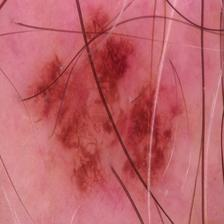

In [ ]:
image = ex['image']
image

In [ ]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['Benign', 'Malignant'], id=None)

In [ ]:
labels.int2str(ex['label'])

'Benign'

Filter:   0%|          | 0/11879 [00:00<?, ? examples/s]

Filter:   0%|          | 0/11879 [00:00<?, ? examples/s]

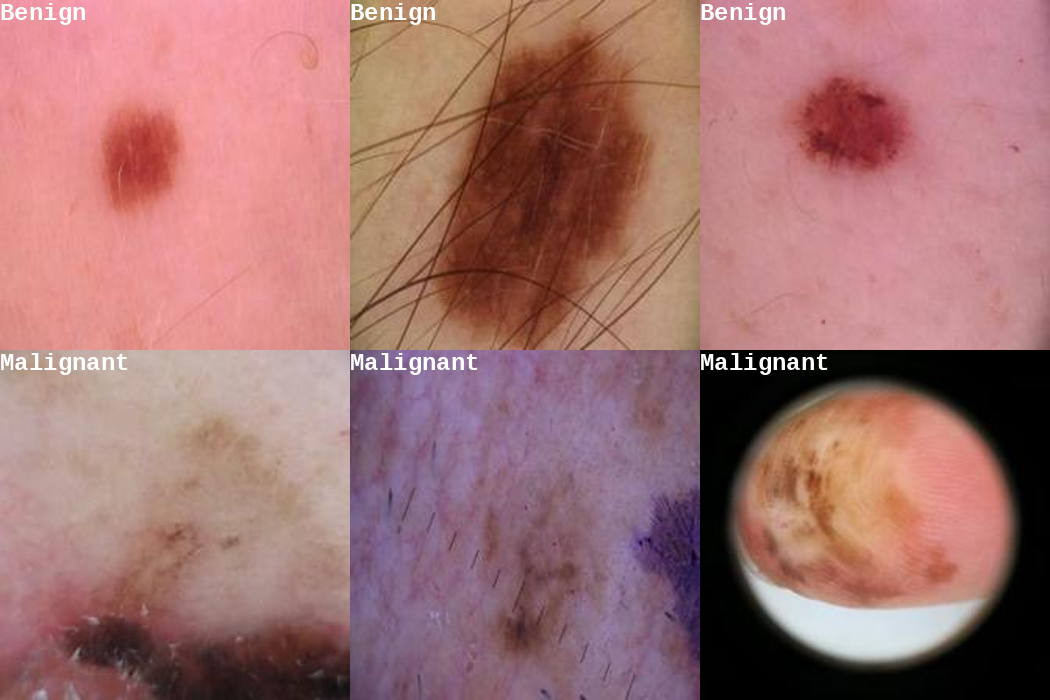

In [ ]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):
    w, h = size
    labels = ds['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

In [ ]:
from transformers import ViTImageProcessor

In [ ]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
processor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.6941,  0.6941,  0.6078,  ...,  0.5529,  0.0039,  0.1608],
          [ 0.7098,  0.6549,  0.4667,  ...,  0.5843,  0.0667,  0.1686],
          [ 0.6941,  0.5451,  0.2627,  ...,  0.6235,  0.1608,  0.1765],
          ...,
          [ 0.5686,  0.5765,  0.5843,  ...,  0.4353,  0.4353,  0.4353],
          [ 0.5765,  0.5765,  0.5843,  ...,  0.4353,  0.4353,  0.4353],
          [ 0.6157,  0.6078,  0.6000,  ...,  0.4353,  0.4353,  0.4353]],

         [[-0.0275, -0.0275, -0.0980,  ..., -0.0118, -0.5608, -0.3961],
          [-0.0118, -0.0667, -0.2392,  ...,  0.0118, -0.4980, -0.3882],
          [-0.0118, -0.1608, -0.4431,  ...,  0.0510, -0.4039, -0.3882],
          ...,
          [ 0.0039,  0.0118,  0.0196,  ..., -0.1608, -0.1608, -0.1608],
          [ 0.0118,  0.0118,  0.0196,  ..., -0.1608, -0.1608, -0.1608],
          [ 0.0510,  0.0431,  0.0353,  ..., -0.1608, -0.1608, -0.1608]],

         [[ 0.0588,  0.0588, -0.0196,  ...,  0.0745, -0.4510, -0.2863],
          [ 0

In [ ]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['label'] = example_batch['label']
    return inputs

In [ ]:
prepared_ds = ds.with_transform(transform)

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [ ]:
pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import evaluate  # Import evaluate instead of datasets

# Load accuracy metric using evaluate
metric = evaluate.load("accuracy")

def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


In [ ]:
from transformers import ViTForImageClassification

labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=20,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
print(prepared_ds.keys())


dict_keys(['train', 'test'])


In [ ]:
eval_dataset = prepared_ds["test"]  # Use test split if validation is missing


In [ ]:
from transformers import Trainer

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],  # Use test instead of validation
    tokenizer=processor,  # Consider replacing with `processing_class` if using transformers v5.0+
)

<ipython-input-26-5363a14a0444>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy
100,0.417300,0.285507,0.890000
200,0.378400,0.282031,0.908000
300,0.297900,0.307704,0.874000
400,0.203300,0.502197,0.788000
500,0.323800,0.209080,0.935500
600,0.213300,0.259687,0.902000
700,0.240400,0.249717,0.913000
800,0.229000,0.214763,0.918000
900,0.294000,0.291656,0.902000
1000,0.301100,0.199126,0.931000


Step,Training Loss,Validation Loss,Accuracy
100,0.417300,0.285507,0.890000
200,0.378400,0.282031,0.908000
300,0.297900,0.307704,0.874000
400,0.203300,0.502197,0.788000
500,0.323800,0.209080,0.935500
600,0.213300,0.259687,0.902000
700,0.240400,0.249717,0.913000
800,0.229000,0.214763,0.918000
900,0.294000,0.291656,0.902000
1000,0.301100,0.199126,0.931000


***** train metrics *****
  epoch                    =          20.0
  total_flos               = 17146157932GF
  train_loss               =        0.0686
  train_runtime            =    1:31:39.40
  train_samples_per_second =        43.201
  train_steps_per_second   =         2.702


In [ ]:
print(model)  # Shows the model architecture
print(model.config)  # Displays model configuration


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
metrics = trainer.evaluate(prepared_ds['test'])
accuracy = metrics.get("eval_accuracy", None)  # Ensure the key exists
if accuracy is not None:
    print(f" Accuracy: {accuracy * 100:.2f}%")
else:
    print("Accuracy key not found in metrics:", metrics)


 Accuracy: 95.25%


In [ ]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("test", metrics)
trainer.save_metrics("test", metrics)
print(metrics)

***** test metrics *****
  epoch                   =       20.0
  eval_accuracy           =     0.9525
  eval_loss               =     0.1361
  eval_runtime            = 0:00:14.50
  eval_samples_per_second =    137.898
  eval_steps_per_second   =     17.237
{'eval_loss': 0.13614535331726074, 'eval_accuracy': 0.9525, 'eval_runtime': 14.5034, 'eval_samples_per_second': 137.898, 'eval_steps_per_second': 17.237, 'epoch': 20.0}


In [ ]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("test", metrics)
trainer.save_metrics("test", metrics)
print(metrics)

***** test metrics *****
  epoch                   =       20.0
  eval_accuracy           =     0.9525
  eval_loss               =     0.1386
  eval_runtime            = 0:00:14.11
  eval_samples_per_second =    141.726
  eval_steps_per_second   =     17.716
{'eval_loss': 0.1386479139328003, 'eval_accuracy': 0.9525, 'eval_runtime': 14.1117, 'eval_samples_per_second': 141.726, 'eval_steps_per_second': 17.716, 'epoch': 20.0}


In [ ]:
trainer.save_model("vit_skin_cancer_model")
processor.save_pretrained("vit_skin_cancer_processor")


['vit_skin_cancer_processor/preprocessor_config.json']

In [ ]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("test", metrics)
trainer.save_metrics("test", metrics)
print(metrics)

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


***** test metrics *****
  epoch                   =       20.0
  eval_accuracy           =      0.955
  eval_loss               =      0.131
  eval_runtime            = 0:00:19.36
  eval_samples_per_second =    103.279
  eval_steps_per_second   =      6.455
{'eval_loss': 0.13097156584262848, 'eval_accuracy': 0.955, 'eval_runtime': 19.365, 'eval_samples_per_second': 103.279, 'eval_steps_per_second': 6.455, 'epoch': 20.0}


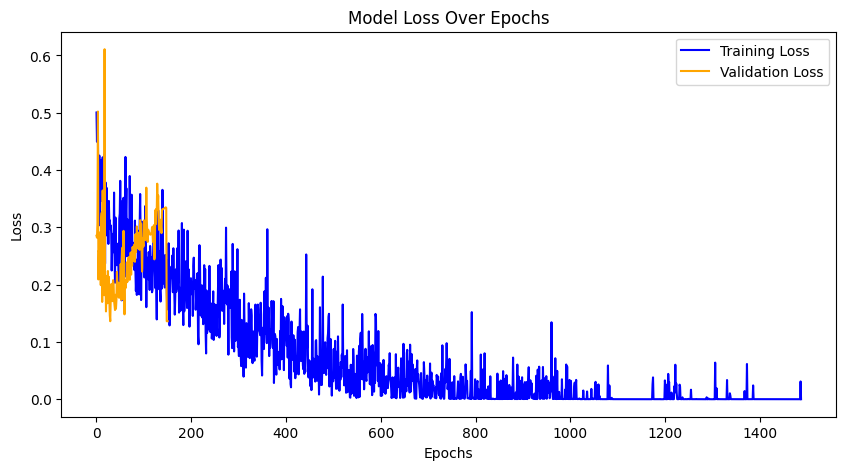

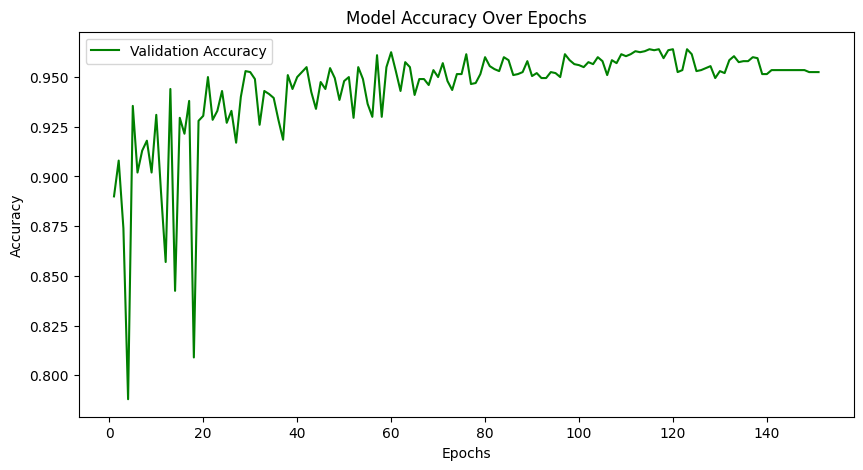

In [ ]:
import matplotlib.pyplot as plt

# Extract logged metrics
logs = trainer.state.log_history

# Separate metrics
epochs = list(range(1, len(logs) + 1))
train_loss = [log["loss"] for log in logs if "loss" in log]
eval_loss = [log["eval_loss"] for log in logs if "eval_loss" in log]
eval_accuracy = [log["eval_accuracy"] for log in logs if "eval_accuracy" in log]

# Plot Loss Over Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", color="blue")
plt.plot(range(1, len(eval_loss) + 1), eval_loss, label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.show()

# Plot Accuracy Over Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eval_accuracy) + 1), eval_accuracy, label="Validation Accuracy", color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.show()


In [ ]:
import numpy as np

predictions = trainer.predict(prepared_ds["test"])
pred_labels = np.argmax(predictions.predictions, axis=1)  # Convert logits to class labels

# Get actual labels
true_labels = np.array([example["label"] for example in prepared_ds["test"]])


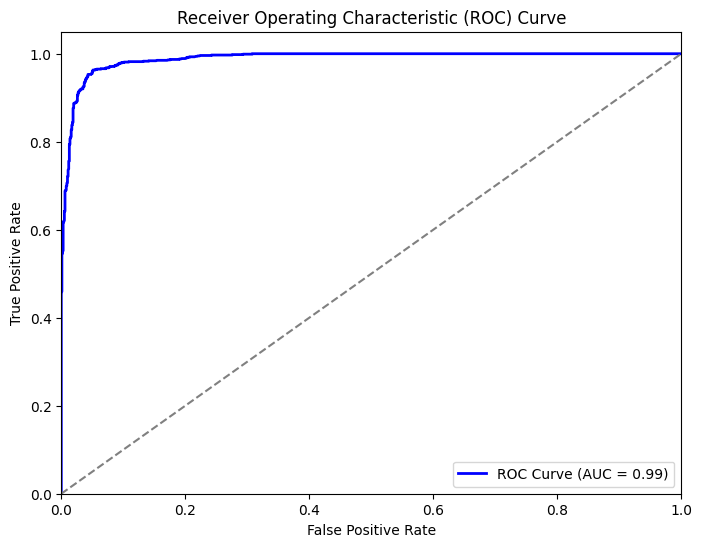

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get model predictions on test dataset
preds_output = trainer.predict(prepared_ds["test"])
y_true = preds_output.label_ids  # True labels
y_scores = preds_output.predictions[:, 1]  # Probability of class 1

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


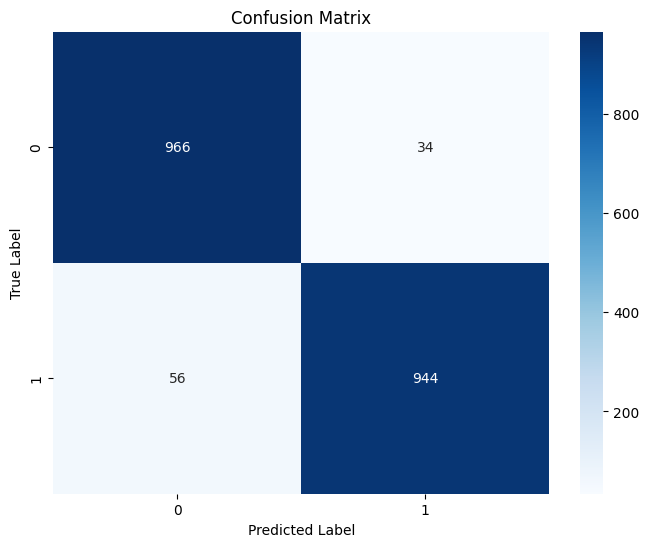

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, pred_labels))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1000
           1       0.97      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.95      0.95      2000



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Load the training history from Trainer
train_loss = trainer.state.log_history

In [ ]:
# Extract values
epochs = []
train_losses = []
eval_losses = []
accuracies = []

for entry in train_loss:
    if "loss" in entry:
        epochs.append(entry["step"])
        train_losses.append(entry["loss"])
    if "eval_loss" in entry:
        eval_losses.append(entry["eval_loss"])
    if "eval_accuracy" in entry:
        accuracies.append(entry["eval_accuracy"])

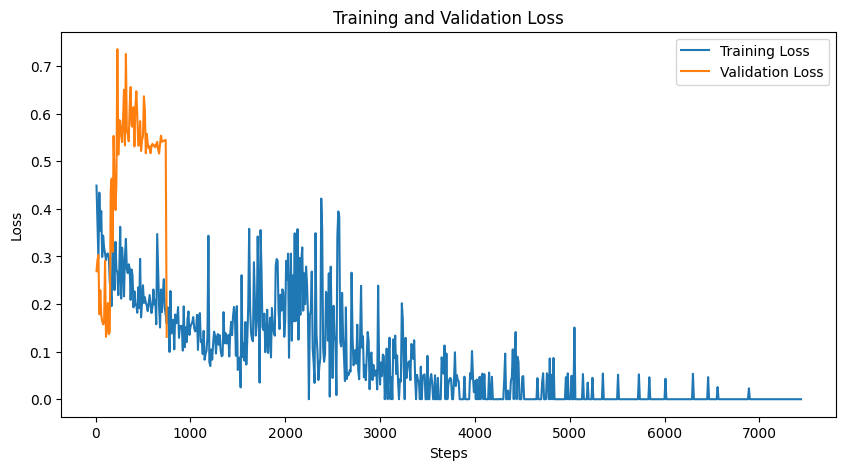

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label="Training Loss")
if eval_losses:
    plt.plot(epochs[:len(eval_losses)], eval_losses, label="Validation Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

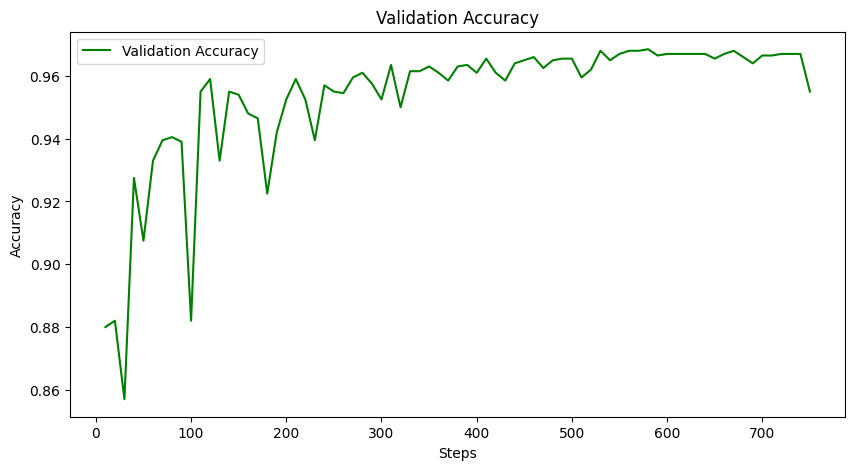

In [ ]:
# Plot Accuracy
if accuracies:
    plt.figure(figsize=(10, 5))
    plt.plot(epochs[:len(accuracies)], accuracies, label="Validation Accuracy", color="green")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy")
    plt.legend()
    plt.show()

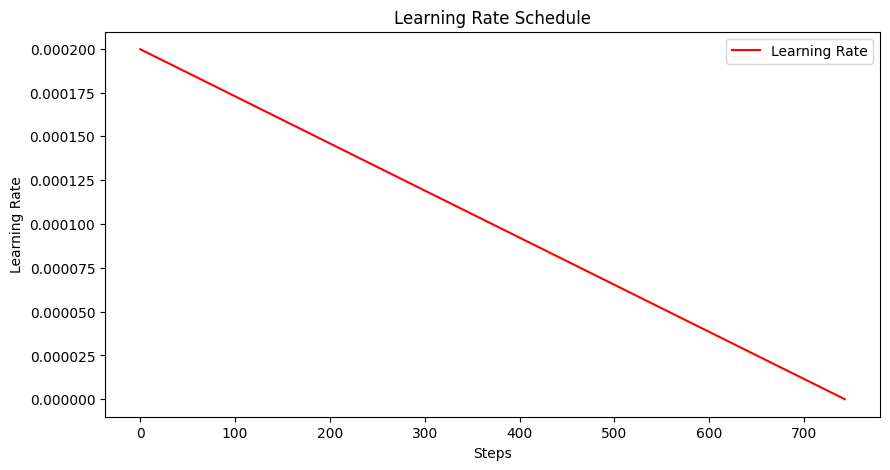

In [ ]:
# Extract learning rate
lrs = [entry["learning_rate"] for entry in train_loss if "learning_rate" in entry]

plt.figure(figsize=(10, 5))
plt.plot(range(len(lrs)), lrs, label="Learning Rate", color="red")
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.legend()
plt.show()


In [ ]:
import lime
import lime.lime_image
import shap
import numpy as np
import torch
import torchvision.transforms as transforms
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import torch.nn.functional as F

# Load your trained ViT model (assuming PyTorch-based ViT model)
model.eval()

def preprocess_image(img):
    """Preprocess input image for model prediction."""
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    return transform(img).unsqueeze(0)  # Add batch dimension

  0%|          | 0/1000 [00:00<?, ?it/s]

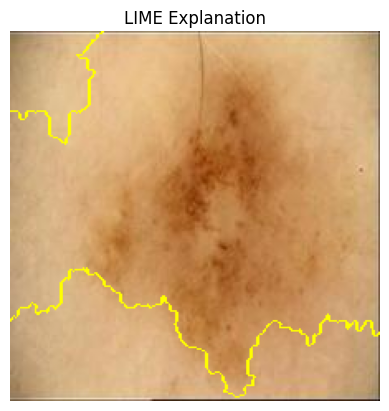

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from lime import lime_image
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image

# Correct model path - point to the directory, NOT a file
model_path = "/kaggle/working/vit-base-beans"  # Make sure this is the directory with model files

# Load the processor and model
processor = ViTImageProcessor.from_pretrained(model_path)
model = ViTForImageClassification.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")

# Function to load an image correctly
def load_image(image_path):
    """Loads and preprocesses the image correctly for LIME."""
    image = Image.open(image_path).convert("RGB")  # Ensure 3-channel RGB
    return np.array(image)  # Convert to NumPy array

# Prediction function for LIME
def predict_function(images):
    """Processes a batch of images and returns predictions."""
    inputs = processor(images=[Image.fromarray(img) for img in images], return_tensors="pt")
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = torch.nn.functional.softmax(logits, dim=1)
    return probs.cpu().numpy()

# Apply LIME Explainability
explainer = lime.lime_image.LimeImageExplainer()

# Load and preprocess image
image_path = "/kaggle/input/melanoma-cancer-dataset/test/Benign/6301.jpg"  # Replace with actual path
image = load_image(image_path)

# Generate LIME explanation
explanation = explainer.explain_instance(
    image, predict_function, top_labels=1, hide_color=0, num_samples=1000
)

# Visualizing LIME explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.axis("off")
plt.show()


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.segmentation import mark_boundaries
from lime import lime_image
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image

In [ ]:
# Load the model and processor
model_path = "/kaggle/working/vit-base-beans"  # Update with correct model path
processor = ViTImageProcessor.from_pretrained(model_path)
model = ViTForImageClassification.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Function to load an image correctly
def load_image(image_path):
    """Loads and preprocesses the image correctly."""
    image = Image.open(image_path).convert("RGB")
    return np.array(image)  # Convert to NumPy array


In [ ]:
# Prediction function for LIME
def predict_function(images):
    """Processes a batch of images and returns predictions."""
    inputs = processor(images=[Image.fromarray(img) for img in images], return_tensors="pt")
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = torch.nn.functional.softmax(logits, dim=1)
    return probs.cpu().numpy()


In [ ]:
# Apply LIME Explainability
def generate_lime_heatmap(image_path):
    """Generate and display LIME explanation heatmap."""
    explainer = lime.lime_image.LimeImageExplainer()
    image = load_image(image_path)

    explanation = explainer.explain_instance(
        image, predict_function, top_labels=1, hide_color=0, num_samples=1000
    )

    # Generate heatmap
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp, mask))
    plt.title("LIME Explanation")
    plt.show()


In [ ]:
# Load an image for explanation
image_path = "/kaggle/input/melanoma-cancer-dataset/test/Benign/6301.jpg"

  0%|          | 0/1000 [00:00<?, ?it/s]

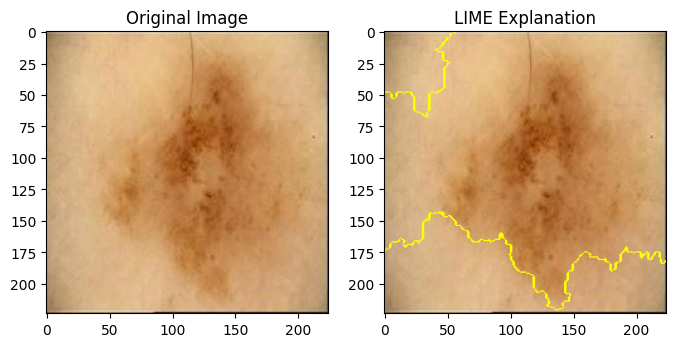

In [ ]:
# Generate LIME Explanation
generate_lime_heatmap(image_path)

In [ ]:
model.save_pretrained("/content/vit-melanoma-model")
processor.save_pretrained("/content/vit-melanoma-model")


['/content/vit-melanoma-model/preprocessor_config.json']

In [ ]:
model_path = "/content/vit-melanoma-model"
processor = ViTImageProcessor.from_pretrained(model_path)
model = ViTForImageClassification.from_pretrained(model_path)


Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


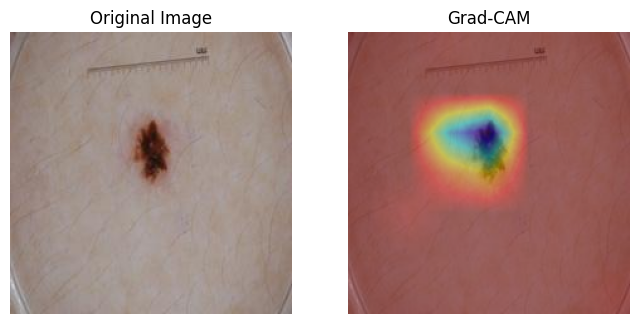

In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image

# Load a melanoma-optimized model (EfficientNet trained on HAM10000)
model = torch.hub.load('rwightman/gen-efficientnet-pytorch', 'tf_efficientnet_b3_ns', pretrained=True)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def preprocess_image(image_path):
    """Preprocess image for model input."""
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0).to(device)

def compute_gradcam(model, image_path, target_layer='blocks.5'):  # Adjusted to EfficientNet layers
    """Computes Grad-CAM heatmap with improved focus."""
    image, input_tensor = preprocess_image(image_path)

    # Forward pass
    features = []
    gradients = []
    def forward_hook(module, input, output):
        features.append(output)
    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    # Register hooks
    layer = dict([*model.named_modules()])[target_layer]
    layer.register_forward_hook(forward_hook)
    layer.register_backward_hook(backward_hook)

    # Get model predictions
    output = model(input_tensor)
    class_idx = output.argmax().item()

    # Compute gradients
    model.zero_grad()
    output[:, class_idx].backward()

    # Compute Grad-CAM
    grads = gradients[0].mean(dim=[2, 3], keepdim=True)
    activation = features[0]
    cam = torch.nn.functional.relu((grads * activation).sum(dim=1)).squeeze().cpu().detach().numpy()
    cam = (cam - cam.min()) / (cam.max() - cam.min())
    cam = cv2.resize(cam, (image.size[0], image.size[1]))

    # Overlay heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    image_cv = np.array(image)
    overlay = cv2.addWeighted(image_cv, 0.6, heatmap, 0.4, 0)

    # Show results
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title("Grad-CAM")
    plt.axis("off")
    plt.show()

# Apply Grad-CAM to melanoma image
image_path = "/content/melanoma_data/train/Malignant/1009.jpg"  # Replace with your image path
compute_gradcam(model, image_path)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


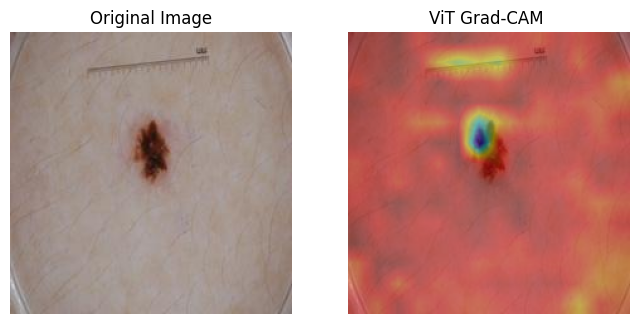

In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from transformers import AutoModelForImageClassification, AutoImageProcessor
from PIL import Image

# 🔹 Choose a well-trained ViT model (BEiT / DINOv2 for better Grad-CAM)
model_name = "microsoft/beit-base-patch16-224"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model & processor
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name).to(device)
model.eval()

# Store feature maps & gradients
feature_maps = None
gradients = None

def forward_hook(module, input, output):
    global feature_maps
    feature_maps = output  # Save feature map

def backward_hook(module, grad_in, grad_out):
    global gradients
    gradients = grad_out[0]  # Save gradient

# Register hooks to capture activations from last conv layer
last_conv_layer = None
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        last_conv_layer = module  # Get last convolutional layer

# Attach hooks to last conv layer
if last_conv_layer:
    last_conv_layer.register_forward_hook(forward_hook)
    last_conv_layer.register_backward_hook(backward_hook)

def preprocess_image(image_path):
    """Loads and preprocesses an image."""
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    return image, {k: v.to(device) for k, v in inputs.items()}

def compute_gradcam_vit(model, image_path):
    """Computes a Grad-CAM heatmap for a ViT model."""

    global feature_maps, gradients

    # Load & Preprocess Image
    image, inputs = preprocess_image(image_path)

    # Forward Pass
    output = model(**inputs)
    class_idx = torch.argmax(output.logits, dim=1).item()  # Get predicted class

    # Backpropagate Class Score
    model.zero_grad()
    output.logits[:, class_idx].backward()

    # Get Feature Map and Gradients
    if feature_maps is None or gradients is None:
        raise ValueError("Feature maps or gradients not captured. Check hooks!")

    weights = torch.mean(gradients, dim=(2, 3), keepdim=True)  # Global Average Pooling
    gradcam_map = torch.sum(weights * feature_maps, dim=1).squeeze().cpu().detach().numpy()


    # Apply ReLU to keep positive activations
    gradcam_map = np.maximum(gradcam_map, 0)

    # Normalize for visualization
    gradcam_map = (gradcam_map - gradcam_map.min()) / (gradcam_map.max() - gradcam_map.min())

    # Resize heatmap to image size
    gradcam_map = cv2.resize(gradcam_map, (image.size[0], image.size[1]))

    # Convert to Heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * gradcam_map), cv2.COLORMAP_JET)

    # Overlay on Image
    image_cv = np.array(image)
    overlay = cv2.addWeighted(image_cv, 0.6, heatmap, 0.4, 0)

    # Show Results
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title("ViT Grad-CAM ")
    plt.axis("off")

    plt.show()

# Apply Grad-CAM
image_path = "/content/melanoma_data/train/Malignant/1009.jpg"
compute_gradcam_vit(model, image_path)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]


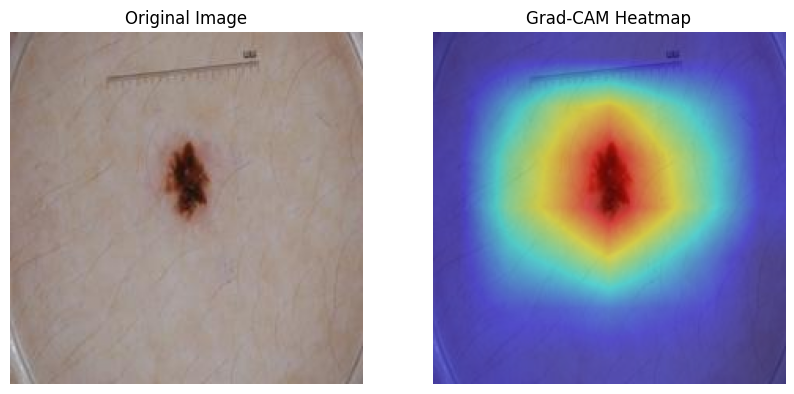

In [ ]:
import torch
import torchvision.models as models
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)
model.eval()  # Set to evaluation mode

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Grad-CAM Hook to capture gradients
gradients = None
activations = None

def save_gradient(grad):
    global gradients
    gradients = grad

# Register hook to capture the last convolutional layer (ResNet18: layer4)
def forward_hook(module, input, output):
    global activations
    activations = output
    output.register_hook(save_gradient)

# Attach hooks to the last conv layer (layer4 in ResNet-18)
target_layer = model.layer4
hook = target_layer.register_forward_hook(forward_hook)

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess image
image_path = "/content/melanoma_data/train/Malignant/1009.jpg"  # Replace with your image path
image = Image.open(image_path)
img_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Forward pass
output = model(img_tensor)
pred_class = output.argmax(dim=1)  # Get predicted class

# Backward pass to get gradients
model.zero_grad()
output[:, pred_class].backward()

# Compute Grad-CAM heatmap
weights = gradients.mean(dim=[2, 3], keepdim=True)  # Global average pooling
gradcam = torch.sum(weights * activations, dim=1).squeeze(0)  # Weighted sum

# Normalize heatmap
gradcam = torch.relu(gradcam).cpu().detach().numpy()
gradcam = cv2.resize(gradcam, (224, 224))  # Resize to match input image
gradcam = (gradcam - gradcam.min()) / (gradcam.max() - gradcam.min())  # Normalize

# Convert image to numpy for overlay
image_np = np.array(image.resize((224, 224))) / 255.0

# Overlay Grad-CAM heatmap on image
heatmap = cv2.applyColorMap(np.uint8(255 * gradcam), cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
overlay = (0.5 * heatmap / 255.0) + (0.5 * image_np)  # Blend images

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_np)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(overlay)
ax[1].set_title("Grad-CAM Heatmap")
ax[1].axis("off")

plt.show()

# Remove hook after execution
hook.remove()

In [ ]:
from transformers import ViTForImageClassification, ViTImageProcessor

# Define save path
save_directory = "/content/my_finetuned_vit"  # Change this to your desired location

# Save the model
model.save_pretrained(save_directory)

# Save the processor
processor.save_pretrained(save_directory)

print(f"Model and processor saved to {save_directory}")


Model and processor saved to /content/my_finetuned_vit
